# Compressed sensing example: 1D

## Formulation

Given a signal $x$ and a basis $\Psi$ and a sparse vector $s$ it is said that $s$ is a sparse representation of $x$ on the basis $\Psi$.
The equation that relates them is:

$x = \Psi s$,

where $x$ has size $n$, $\Psi$ has dimensions $n \times k$, and $s$ has size $k$.



*Sampling:* An undersampled version of $x$ is:

$y = Cx$, 

where $y$ is an undersampled signal of size $p$ and $C$ is a sampling matrix of dimensions $p \times n$.

The undersampled signal $y$ can be also expressed as:

$y = C \Psi s = \Theta s$, where $\Theta = C \Psi$


*Recovery*: In order to get a sparse representation $s$ of $y$ it's possible to solve the following optimization problem:

$min ||s||_1$ s.t. $y = \Theta s$.

The solution $s$ is said to be the recovered sparse representation of $y$ and hopefully a good representation to reconstruct the original signal $x$.


*Reconstruction* of $x$ is done by computing $x = \Psi s$ using the obtained sparse vector $s$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic
import scipy

from optimize import solve_l1
from optimize import cosamp

## Example problem setup

In [2]:
n = 2048
p = 64
k = n
signal_dim = n
undersampled_dim = p
sparse_dim = k

## Signal
$x$

A sinusoidal signal.

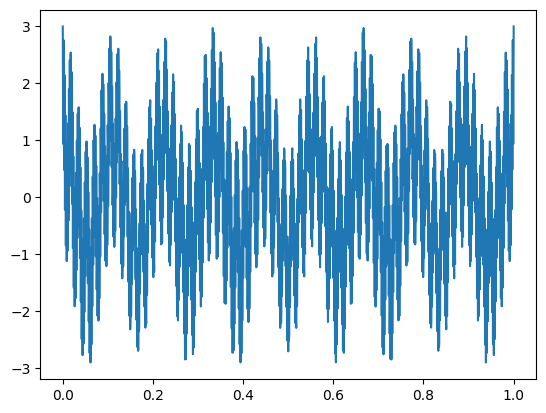

In [3]:
cycle = 2 * np.pi
t = np.linspace(0, 1, signal_dim)
x = np.cos(t * 9 * cycle) + np.cos(t * 57 * cycle) + np.cos(t * 511 * cycle)
plt.plot(t, x)

## Sample matrix
$C$

For this example, $C$ picks some measurements randomly.

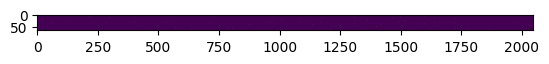

In [4]:
def sample_matrix(undersampled_dim, signal_dim):
    return np.eye(signal_dim)[np.random.randint(signal_dim, size=undersampled_dim)]

C = sample_matrix(undersampled_dim, signal_dim)
plt.imshow(C)

## Undersampled signal
$y = C x$

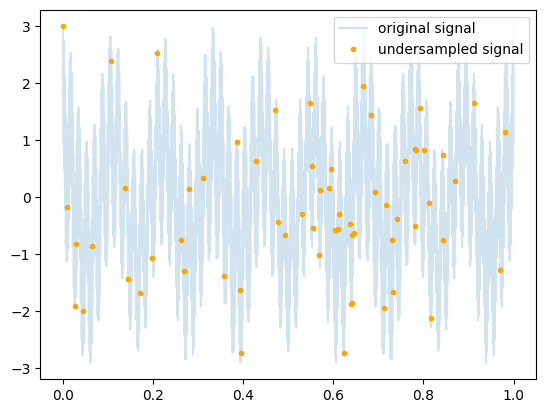

In [5]:
y = C @ x
plt.plot(t, x, alpha=0.2, label='original signal')
plt.plot(C @ t, y, '.', c='orange', label='undersampled signal')
plt.legend()

## Basis
$\Psi$

For this example, $\Psi$ is the Discrete Cosine Transform matrix.

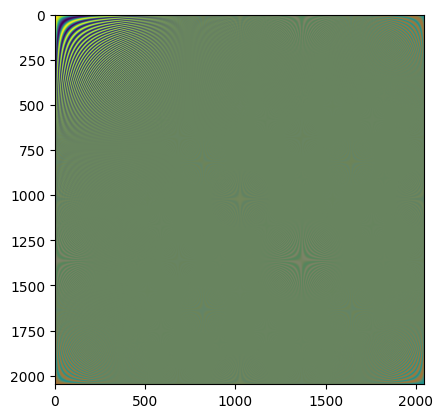

In [6]:
Psi = scipy.fft.dct(np.eye(sparse_dim))
plt.imshow(Psi)

## Theta

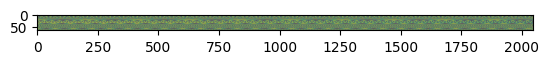

In [7]:
Theta = C @ Psi
plt.imshow(Theta)

## Find sparse representation $s$ of $y$

Find $s$ by solving:

$min ||s||_1$ s.t. $y = \Theta s$

In [8]:
use_cosamp = True  # set to False for solving with SLSQP (can take a while to complete)

if use_cosamp:
    sparsity = 3  # number of sparse elements in solution
    s = cosamp(Theta, y, sparsity, max_iter=2000)
else:
    solution = solve_l1(y, Theta, maxiter=1000)
    s = solution.x
    print(solution)

ic| f'Converged. Iteration {it}.': 'Converged. Iteration 5.'


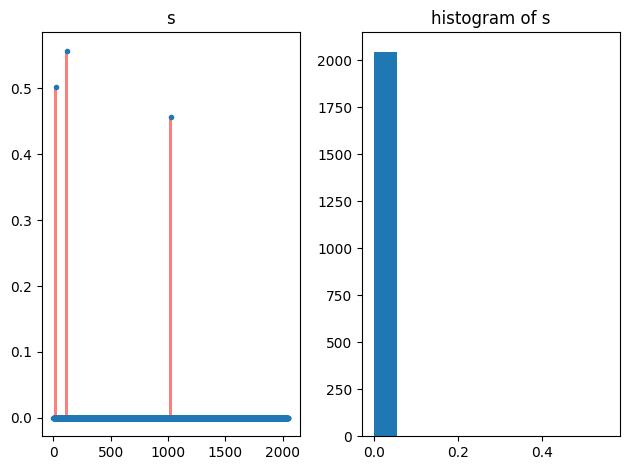

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)

ax1.plot(s, 'red', alpha=.5)
ax1.plot(s, '.')
ax1.set_title('s')
ax2.hist(s)
ax2.set_title('histogram of s')
plt.tight_layout()

### Check $s$ quality

Text(0.5, 1.0, 'difference')

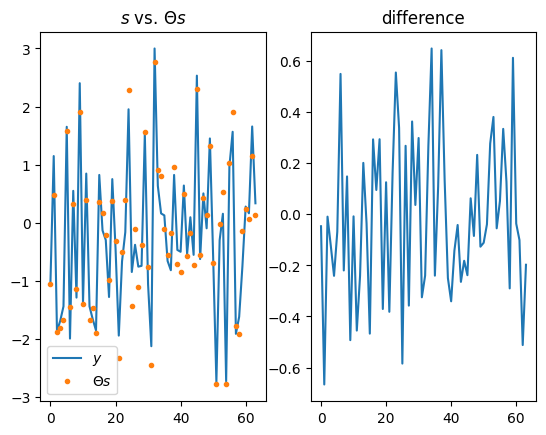

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(y, label='$y$')
ax1.plot(Theta @ s, '.', label='$\Theta s$')
ax1.set_title('$s$ vs. $\Theta s$')
ax1.legend()

ax2.plot(Theta @ s - y)
ax2.set_title('difference')

## Reconstruct $x$

Reconstruction of $x$ is done by computing $x = \Psi s$ using the obtained sparse vector $s$.

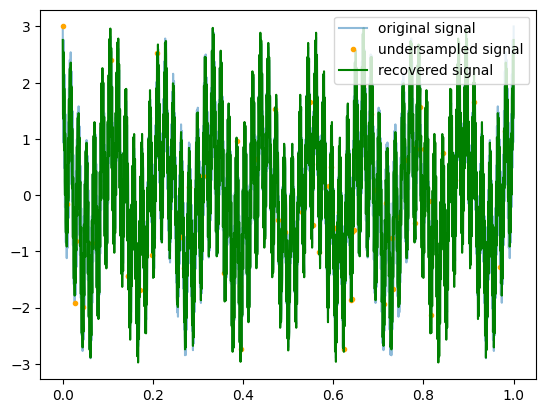

In [11]:
plt.plot(t, x, alpha=0.5, label='original signal')
plt.plot(C @ t, y, '.', c='orange', label='undersampled signal')
plt.plot(t, Psi @ s, c='green', label='recovered signal')
plt.legend()

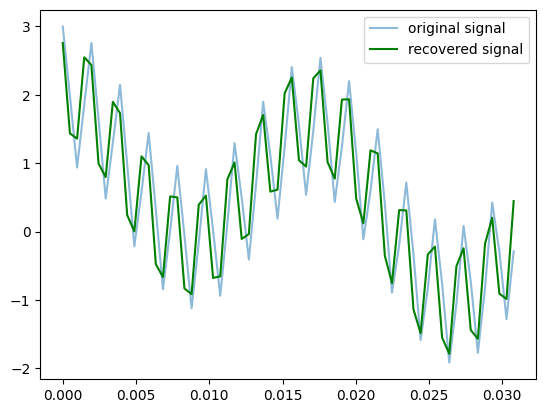

In [12]:
# zoom
y = C @ x
_s = np.s_[:64]
plt.plot(t[_s], x[_s], alpha=0.5, label='original signal')
plt.plot(t[_s], (Psi @ s)[_s], c='green', label='recovered signal')
plt.legend()